DZ_9_Линейная регрессия Логистическая регрессия

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as math
import matplotlib.pyplot as plt

###1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
###zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
###ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
###Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).Произвести расчет как с использованием intercept, так и без него

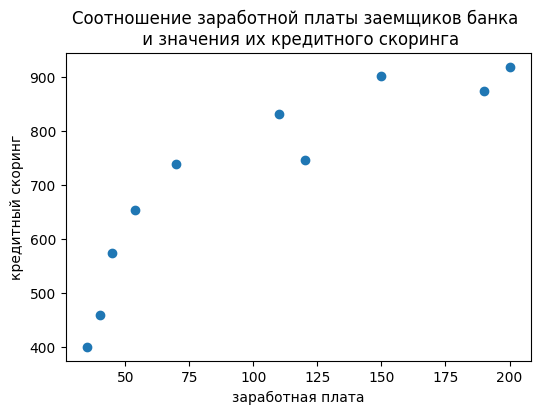

In [ ]:
x_zp =  np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.figure(figsize=(6, 4))
plt.scatter(x_zp, y_ks)
plt.title('Соотношение заработной платы заемщиков\n и их кредитного скоринга')
plt.xlabel('заработная плата')
plt.ylabel('кредитный скоринг')
plt.show()

на графике видна линейная зависимость, используем формулу для нахождения линейной регрессии: ȳ =  β0 + β1 * x . Так как ks - целевая переменная, то преобразуем формулу: y_ks =  β0 + β1 * x_zp  

###1.1 Расчет коэффициентов линейной регрессии со сдвигом (intercept):

In [ ]:
#найдем коэффициенты β0 и β1
# β1 по формуле = x̄ȳ - x̄² * ȳ² / ￣x² - x̄²
β1 = (np.mean(x_zp * y_ks) - np.mean(x_zp) * np.mean(y_ks)) / (np.mean(x_zp**2) - np.mean(x_zp)**2)

# β0 по формуле = ȳ - β1 * x̄
β0 = np.mean(y_ks) - β1 * np.mean(x_zp)

y_ks =  β0 + β1 * x_zp
print(f'b1(slope) = {β1}, b0(intercept) = {β0}')

b1(slope) = 2.620538882402765, b0(intercept) = 444.1773573243596


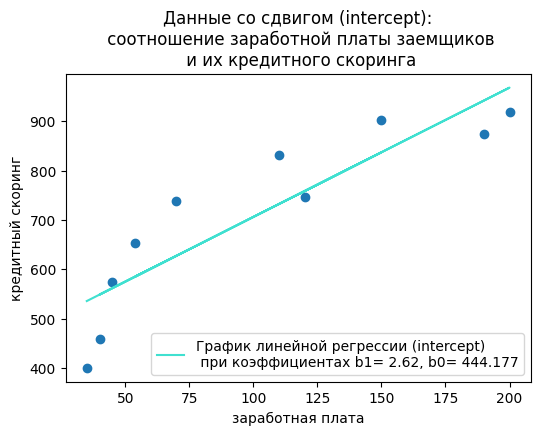

In [ ]:
x_zp =  np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.figure(figsize=(6, 4))
plt.scatter(x_zp, y_ks)
plt.plot(x_zp, β0 + β1 * x_zp, label = 'График линейной регрессии (intercept)\n при коэффициентах b1= 2.62, b0= 444.177', color ='turquoise')
plt.title('Данные со сдвигом (intercept):\n соотношение заработной платы заемщиков\n и их кредитного скоринга')
plt.xlabel('заработная плата')
plt.ylabel('кредитный скоринг')
plt.legend()
plt.show()

In [ ]:
x_zp =  np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#Найдем нужные данные для использования их в формуле: cov = [XY]avg - [X]avg * [Y]avg
x_zp_avg = sum(x_zp) /len(x_zp) # расчет среднего массива
y_ks_avg = y_ks.mean() # через функцию mean
xy_avg = (x_zp * y_ks).mean() #среднее значение суммированных значений массивов

###1.2 Расчет коэффициентов линейной регрессии БЕЗ сдвига (no intercept):
ȳ =  β1 * x . Так как ks - целевая переменная, то преобразуем формулу: y_ks =  β1 * x_zp  

In [13]:
β1 = (np.mean(x_zp * y_ks) - np.mean(x_zp) * np.mean(y_ks)) / (np.mean(x_zp**2) - np.mean(x_zp)**2)

y_ks =  β1 * x_zp
print(f'b1(slope) = {β1}, b0(intercept) = отсутствует')

b1(slope) = 2.620538882402765, b0(intercept) = отсутствует


In [17]:
x_zp =  np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.figure(figsize=(6, 4))
plt.scatter(x_zp, y_ks)
plt.plot(x_zp, β1 * x_zp, label = 'График линейной регрессии (intercept)\n при коэффициентах b1 = 2.62, b0 = 444.177', color ='blue')
plt.title('Данные БЕЗ сдвига (no intercept):\n соотношение заработной платы заемщиков\n и их кредитного скоринга')
plt.xlabel('заработная плата')
plt.ylabel('кредитный скоринг')
plt.legend(loc = ['lower right'])
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

<Figure size 600x400 with 1 Axes>

###2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Формула линейной регрессии: y_ks = β0 + β1 * x_zp / **формула без учета intercept: y_ks = β1 * x_zp**

In [ ]:
x_zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# нам понадобится значение функции потерь mse - рассчитаем его по формуле: mse =  (2 / len(x)) * np.sum((β1 * x - y) * x)
#и добавим предустановленные коэффициенты
α = 1e-06 # установим скорость обучения (кол-во итераций)
B1 = 0.1 # определяем стартовое значение для B1

#1 без функции:
n = len(x_zp) # кол-во измерений (в данном случае, массивов)
mse = np.sum((B1 * x_zp - y_ks)**2) / n # БЕЗ сдвига (no intercept) np.sum((B1 * x - y)**2) / n
print (f'mse_версия_1: {mse} \n')

#2 через написание функции потерь для B1
def mse_v2(B1, x = x_zp, y = y_ks, n = len(y_ks)):
  return np.sum((B1 * x - y) **2) / n
print (f'mse_версия_2: {mse_v2(B1)}\n')

print ('Коэфф b методом_градиентного спуска:')
for i in range(2000):
    B1 -= α * (2/n) * np.sum((B1 * x_zp - y_ks) * x_zp)
    if i % 200 == 0: # вывод сообщения на каждый 200-ный раз
        print(f"Итерация {i}: B1 = {B1}, mse = {mse_v2(B1)}")


mse_версия_1: 518336.326 

mse_версия_2: 518336.326

Коэфф b методом_градиентного спуска:
Итерация 0: B1 = 0.25952808, mse = 493237.7212546963
Итерация 200: B1 = 5.868748638669329, mse = 56522.97550129376
Итерация 400: B1 = 5.8897415574471985, mse = 56516.85850140053
Итерация 600: B1 = 5.889820124983314, mse = 56516.85841572062
Итерация 800: B1 = 5.88982041902807, mse = 56516.8584157194
Итерация 1000: B1 = 5.8898204201285544, mse = 56516.85841571941
Итерация 1200: B1 = 5.889820420132673, mse = 56516.85841571943
Итерация 1400: B1 = 5.889820420132673, mse = 56516.85841571943
Итерация 1600: B1 = 5.889820420132673, mse = 56516.85841571943
Итерация 1800: B1 = 5.889820420132673, mse = 56516.85841571943


После ~ 1200 итерации минимальное значение 5.889820420132673
при коэффициенте B1 = 5.889820420132673 найдено,
но программа продолжила работать впустую после нахождения минимума, исправим это:

In [2]:
x_zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# нам понадобится значение функции потерь mse - рассчитаем его по формуле: mse =  (2 / len(x)) * np.sum((β1 * x - y) * x)
#и добавим предустановленные коэффициенты
α = 1e-06 # установим скорость обучения (кол-во итераций)
B1 = 0.1 # определяем стартовое значение для B1

#1 без функции:
n = len(x_zp) # кол-во измерений (в данном случае, массивов)
mse = np.sum((B1 * x_zp - y_ks)**2) / n # БЕЗ сдвига (no intercept) np.sum((B1 * x - y)**2) / n
print (f'mse_версия_1: {mse} \n')

#2 через написание функции потерь для B1
def mse_v2(B1, x = x_zp, y = y_ks, n = len(y_ks)):
  return np.sum((B1 * x - y) **2) / n
print (f'mse_версия_2: {mse_v2(B1)}\n')


print ('mse_версия_методом_градиентного спуска:')
i = 0
while True:
    i += 1
    old_B1 = B1
    B1 -= α * (2/n) * np.sum((B1 * x_zp - y_ks) * x_zp)
    new_mse = mse_v2(B1)
    if i % 200 == 0: # вывод сообщения на каждый 200-ный раз
        print(f"Итерация {i}: B1 = {B1}, mse = {new_mse}")

    if abs(B1 - old_B1) < 1e-10:  # проверка на минимальное изменение B1
        print (f'!Минимальный коэфф b методом_градиентного спуска найдена после {i} итерации')
        break

mse_версия_1: 518336.326 

mse_версия_2: 518336.326

mse_версия_методом_градиентного спуска:
Итерация 200: B1 = 5.868151593145588, mse = 56523.327053798086
Итерация 400: B1 = 5.8897393229605965, mse = 56516.85850632468
Итерация 600: B1 = 5.889820116620584, mse = 56516.85841572067
!Минимальный коэфф b методом_градиентного спуска найдена после 760 итерации


Проверим найденный коэффициент через функцию def mse_v2 выше:

In [ ]:
print (f'mse_версия_2: {mse_v2(5.889820116620584)}\n')

mse_версия_2: 56516.85841572067




###3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
x_zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Установка скорости обучения и стартовых значений для коэффициентов
α = 10e-7
B0 = 0.1
B1 = 0.1

# Функция потерь для B0 и B1
def mse_v3(B0, B1, x=x_zp, y=y_ks, n = len(x_zp)): # n = len(x_zp) кол-во измерений
    return np.sum(((B0 + B1 * x) - y) ** 2) / n

print('mse_версия_методом_градиентного спуска с intercept:')
i = 0
while True:
    i += 1
    old_B0 = B0
    old_B1 = B1

    # Рассчитываем коэффициенты для B0 и B1 одновременно
    B0 -= α * (2/n) * np.sum(B0 + B1 * x_zp - y_ks)
    B1 -= α * (2/n) * np.sum((B0 + B1 * x_zp - y_ks) * x_zp)



    new_mse = mse_v3(B0, B1)

    if i % 100000 == 0:
        print(f"Iтерация {i}: B0 = {B0}, B1 = {B1}, mse = {new_mse}")

    if abs(B0 - old_B0) < α and abs(B1 - old_B1) < α:
        print(f"!Минимальная mse_версия_методом_градиентного спуска с intercept найдена после {i} итерации: {new_mse}.\n Коэффициент B0 = {B0}, коэффициент B1 = {B1}")
        break

mse_версия_методом_градиентного спуска с intercept:
Iтерация 100000: B0 = 22.106798775474555, B1 = 5.7271632255202976, mse = 51659.18345506476
Iтерация 200000: B0 = 42.98452989822391, B1 = 5.573493971834402, mse = 47299.22354337662
Iтерация 300000: B0 = 62.82954350963433, B1 = 5.427425971766669, mse = 43359.92679081838
Iтерация 400000: B0 = 81.69292300818485, B1 = 5.288583229109761, mse = 39800.70624314375
Iтерация 500000: B0 = 99.62322495071746, B1 = 5.156608346318526, mse = 36584.890907891415
Iтерация 600000: B0 = 116.666604042738, B1 = 5.031161604526616, mse = 33679.347929611424
Iтерация 700000: B0 = 132.86693194604342, B1 = 4.911920089070218, mse = 31054.14121886316
Iтерация 800000: B0 = 148.2659102095399, B1 = 4.7985768582677935, mse = 28682.223017799133
Iтерация 900000: B0 = 162.90317761394354, B1 = 4.690840153315948, mse = 26539.155224506463
Iтерация 1000000: B0 = 176.8164122066523, B1 = 4.5884326472681, mse = 24602.857604888384
Iтерация 1100000: B0 = 190.04142828946598, B1 = 4.

In [14]:
R2 = (np.corrcoef(x_zp, y_ks))**2 #R²
R2 # приблизительно 78.8% изменчивости описано с помощью подобранной математической модели, это средний результат

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

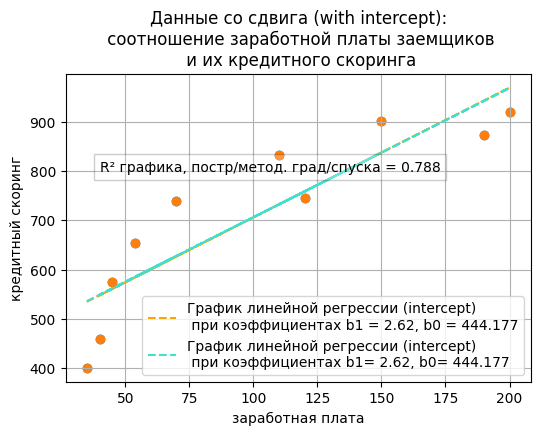

In [36]:
x_zp =  np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.figure(figsize=(6, 4))
# новый график расчет линейной регрессии методом градиентного спуска с β0 (intercept) (задание 3):
plt.scatter(x_zp, y_ks)
β_2_0 = 442.2061502565612
β_2_1 = 2.63504783058243
plt.plot(x_zp, β_2_0 + β_2_1 * x_zp, label = 'График линейной регрессии (intercept)\n при коэффициентах b1 = 2.62, b0 = 444.177', color ='orange', linestyle='dashed')
plt.title('Данные со сдвига (with intercept):\n соотношение заработной платы заемщиков\n и их кредитного скоринга')
plt.grid(True)
plt.text(40, 800, r'R² графика, постр/метод. град/спуска = 0.788', fontsize=10, bbox={'facecolor':'white','alpha':0.2}) #'facecolor':'yellow',
plt.xlabel('заработная плата')
plt.ylabel('кредитный скоринг')
#plt.legend(loc = ['lower right'])

# + добавим график расчета линейной регрессии 1 методом (задание 1): b1(slope) = 2.620538882402765, b0(intercept) = 444.1773573243596
β_1_0 = 444.1773573243596
β_1_1 = 2.620538882402765
plt.scatter(x_zp, y_ks)
plt.plot(x_zp, β_1_0 + β_1_1 * x_zp, label = 'График линейной регрессии (intercept)\n при коэффициентах b1= 2.62, b0= 444.177', color ='turquoise', linestyle='dashed')
plt.legend()
plt.show()

Видим, что графики, построенные 2 методами, практичеки совпали